In [1]:
#import libraries

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
#Data prepaeation
dataset_dir= r"C:\Users\m1355\Documents\WeChat Files\wxid_z0qpzwe8erfg22\FileStorage\File\2023-06\crc_skin_data\crc_skin_data"
input_shape=(224,224,3)
batch_size=8
num_classes=2

In [6]:
#Data augmentation
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen=ImageDataGenerator(
rescale=1./255)

In [7]:
#Generate the train dataset, validation dataset and test dataset
train_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

validation_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

test_generator=test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
#building the model: AlexNet: 8 layers - 5 Conv layers and 3 Fully-connected (FC) layers
model=Sequential()
#Add the convolutional layers
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#Flatten the layers
model.add(Flatten())

#Add the fully connected layers
model.add(Dense(4096, activation='relu')) # first FC
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu')) #second FC
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # third FC

In [9]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
#Train the model
history=model.fit(train_generator, epochs=10, validation_data=(validation_generator), verbose=1)

Epoch 1/10
63/63 [==============================] - 11s 112ms/step - loss: 0.7257 - accuracy: 0.5120 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 6s 100ms/step - loss: 0.6973 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 6s 101ms/step - loss: 0.6939 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 6s 101ms/step - loss: 0.6947 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 6s 102ms/step - loss: 0.6943 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 6s 101ms/step - loss: 0.6941 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 6s 100ms/step - loss: 0.6941 - accuracy: 0.4820 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch

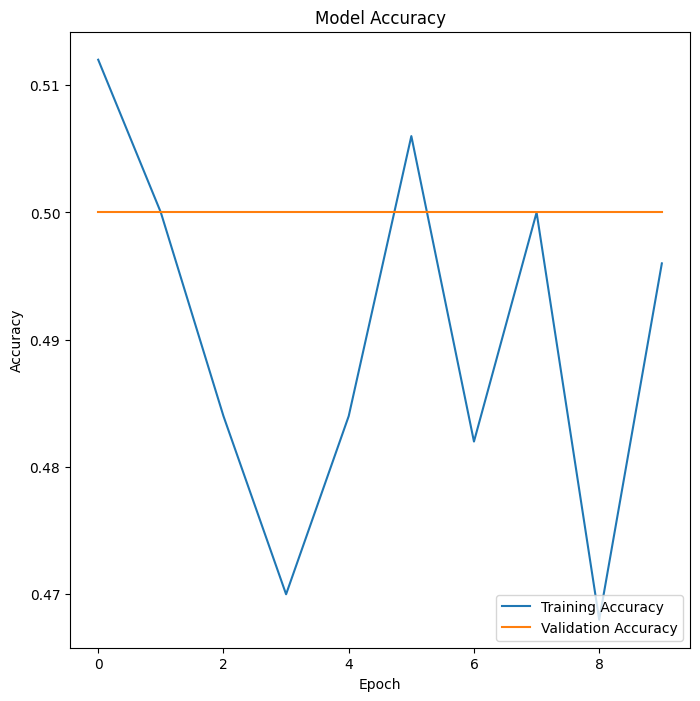

In [11]:
#Training accuracy and validation accuracy graph
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

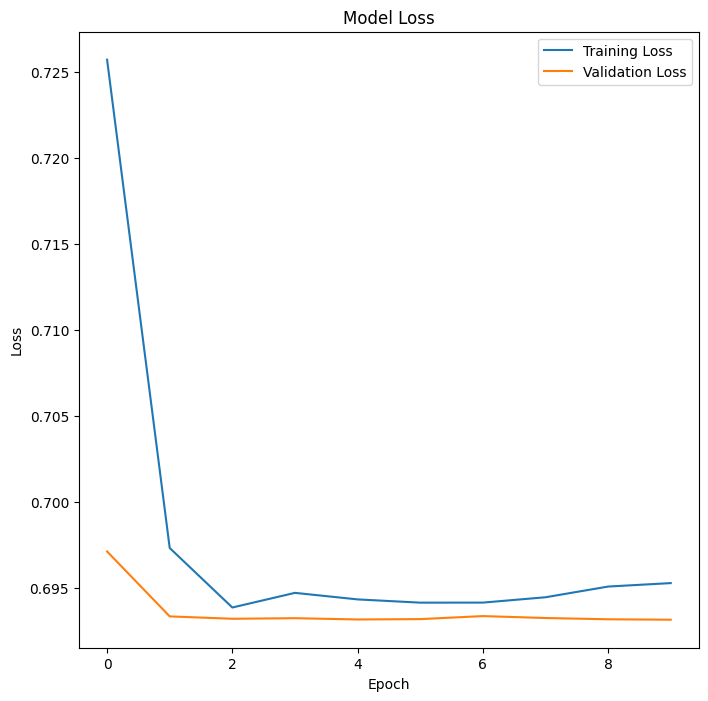

In [12]:
#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()